# Problem 1 - Create Neural Network from Scratch using Numpy

In [1]:
import torch
import torchvision as thv
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from utils import oneHotEncoder, unwrapping_data, data_shuffling

### Problem 1 (a) - Downloading the MNIST dataset and performing random sampling to keep 50% of the train and test dataset

In [2]:
train_set = thv.datasets.MNIST('./data/training.pt', download=True , train=True) 
val_set = thv.datasets.MNIST('./data/test.pt', download=True, train=False) 
print(train_set.data.shape, len(val_set.targets))

torch.Size([60000, 28, 28]) 10000


In [3]:
#Reading training and validation data set into numpy format
train_set_np = train_set.data.numpy()
val_set_np = val_set.data.numpy()

#Reading training and validation target label into numpy format
train_set_target_np = train_set.targets.numpy()
val_set_target_np = val_set.targets.numpy()


In [4]:
#Loading the dataset in the target and test format

train_data_np_t1, train_target_np_t2 = unwrapping_data(train_set_np,train_set_target_np, 0.5)
test_data_np_t1, test_target_np_t2 = unwrapping_data(val_set_np,val_set_target_np, 0.5)

In [5]:
#Normalizing the train and test input features

train_data_np_t1 = (train_data_np_t1 - np.min(train_data_np_t1))/(np.max(train_data_np_t1) - np.min(train_data_np_t1))
test_data_np_t1 = (test_data_np_t1 - np.min(test_data_np_t1))/(np.max(test_data_np_t1) - np.min(test_data_np_t1))


## Defining MNIST dataset variable

In [6]:
#MNIST Dataset Variable

num_class = 10
num_features = 784

## Problem 1 (b) - Implementing Linear Layer

In [7]:
class Linear_Layer_t:
    
    def __init__(self, mean = 0, std = 1, batch_size=32):
        self.w = np.random.normal(mean, std, size=(num_features, num_class))
        self.b = np.random.normal(mean, std, size=((1, num_class)))
        
        _w2_norm = 1/(la.norm(self.w, 2))
        _b2_norm = 1/(la.norm(self.b, 2))
        
        self.w = (_w2_norm)*(self.w)
        self.b = (_b2_norm)*(self.b)
        
        self.batch_size = batch_size
       
         
    def forward(self, a_lprev):
        z_l = a_lprev.dot(self.w) + self.b
        self.a_lprev = a_lprev
        return z_l
    
    def backward(self, da_l):
        da_lprev = np.dot(da_l, (self.w).T)
        self.dw = np.dot((self.a_lprev).T, da_l)/self.batch_size
        self.db = np.sum(da_l, axis=0, keepdims=True)/self.batch_size
        
        return da_lprev
    
    def zero_grad(self):
        self.dw = np.zeros(self.dw.shape)
        self.db = np.zeros(self.db.shape)

## Problem 1 (c) - Implementing ReLU layer

In [8]:
class Relu_t:
    
    def __init_(self):
        pass
    
    def forward(self, z_l):
        self.a_l = np.maximum(0, z_l)
        return self.a_l  
    
    def backward(self, dL):
        self.a_l[self.a_l <= 0] = 0
        self.a_l[self.a_l > 0] = 1
        self.dz_da = dL*self.a_l
        return self.dz_da
    
    def zero_grad(self):
        self.dz_da = np.zeros(self.dz_da.shape)

## Problem 1 (d) - Implementing softmax and cross-entropy layer

In [9]:
class Softmax_Cross_Entropy_t ():
    
    def __init__(self):
        pass
    
    def forward(self, z_lprev, yhat=None):
        y_out = np.exp(z_lprev)/(np.sum(np.exp(z_lprev), axis=1, keepdims=True))
        self.pred = y_out
        if yhat is not None:
            loss = - np.sum((yhat*np.log(y_out)), axis = 1, keepdims=True)
            avg_loss = (1/(loss.shape[0]))*np.sum(loss, axis=0, keepdims=True)
            return self.pred, avg_loss
        return self.pred
    
    
    def backward(self, yhat):
        self.dL_dz = self.pred - yhat
        return self.dL_dz
    
    def zero_grad(self):
        self.dL_dz = np.zeros(self.dL_dz.shape)

## Problem 1 (e) - Implementing forward and backward propagation for single image batch size

In [10]:
train_data_shuffle, train_label_shuffle = data_shuffling(train_data_np_t1, train_target_np_t2)

layer1 = Linear_Layer_t(batch_size=1)
layer2 = Relu_t()
layer3 = Softmax_Cross_Entropy_t()

for itr in range(1):

    x = train_data_shuffle[5].reshape(1, 784)
    yhat = train_label_shuffle[5]
    yhat = yhat[...,None].T
    
    a1 = layer1.forward(x)
    a2 = layer2.forward(a1)
    pred, loss = layer3.forward(a2, yhat)

    print('Forward Propagation of the architecture','\n')
    print('Output of Layer 1', a1)
    print('Output of Layer 2', a2)
    print('Output of Layer 3', pred)
    print('Loss for the sample', loss)
        
    pred_digit = np.argmax(pred, axis=1)
    true_digit = np.argmax(yhat, axis=1)


    da2 = layer3.backward(yhat)
    da1 = layer2.backward(da2)
    dx1 = layer1.backward(da1)
    
    print('Backward Propagation of the architecture','\n')
    print('Back prop of Layer 3', da2)
    print('Back prop of Layer 2', da1)
    print('Back prop of Layer 1', dx1)
    
    print('Update in weights', layer1.dw)
    print()
    print('Update in bias', layer1.db)
    

    dw = layer1.dw
    db = layer1.db

    layer1.w = layer1.w - 0.01*dw
    layer1.b = layer1.b - 0.01*db

    layer1.zero_grad()
    layer2.zero_grad()
    layer3.zero_grad()
         

Forward Propagation of the architecture 

Output of Layer 1 [[-0.34378999 -0.19000517 -0.76272388  0.4074287   0.34397141  0.08137501
   0.85209929  0.47868771  0.06389175  0.15789128]]
Output of Layer 2 [[0.         0.         0.         0.4074287  0.34397141 0.08137501
  0.85209929 0.47868771 0.06389175 0.15789128]]
Output of Layer 3 [[0.07579318 0.07579318 0.07579318 0.11391323 0.10690919 0.08221875
  0.17770194 0.12232679 0.08079379 0.08875676]]
Loss for the sample [[2.57974692]]
Backward Propagation of the architecture 

Back prop of Layer 3 [[ 0.07579318  0.07579318 -0.92420682  0.11391323  0.10690919  0.08221875
   0.17770194  0.12232679  0.08079379  0.08875676]]
Back prop of Layer 2 [[ 0.          0.         -0.          0.11391323  0.10690919  0.08221875
   0.17770194  0.12232679  0.08079379  0.08875676]]
Update in weights [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Problem 1 (f) & (g) - Training Neural Network using mini-batch gradient descent n = 32 and using the trained model for computing validation loss


In [11]:
train_data_shuffle, train_label_shuffle = data_shuffling(train_data_np_t1, train_target_np_t2)

layer1 = Linear_Layer_t(batch_size=32)
layer2 = Relu_t()
layer3 = Softmax_Cross_Entropy_t()

lr = 0.01
batch_size = 32
num_epoch = 120

train_loss_per_epoch = []
train_loss_per_batch = []
train_accuracy_per_epoch = []
train_accuracy_per_batch = []
train_error_per_epoch = []

test_loss_per_epoch = []
test_loss_per_batch = []
test_accuracy_per_epoch = []
test_accuracy_per_batch =[]
test_error_per_epoch = []

for itr in range(num_epoch):
    batch_id = 0
    count=0
    train_accuracy = 0
    train_epoch_loss = 0
    test_accuracy = 0
    test_epoch_loss = 0
    train_data_shuffle, train_label_shuffle = data_shuffling(train_data_np_t1, train_target_np_t2)
    
    for batch_id in range(0, train_data_shuffle.shape[0], batch_size):
        _train_accuracy_per_batch=0
        if (batch_id + batch_size) > (train_data_shuffle.shape[0]):
            train_batch_data = train_data_shuffle[batch_id:train_data_shuffle.shape[0],...]
            train_batch_label = train_label_shuffle[batch_id:train_data_shuffle.shape[0],...]
            batch_id = train_data_shuffle.shape[0]
        else:
            train_batch_data = train_data_shuffle[batch_id:(batch_id+batch_size),...]
            train_batch_label = train_label_shuffle[batch_id:(batch_id+batch_size),...]
            batch_id = batch_id+batch_size


        x = train_batch_data.reshape(train_batch_data.shape[0], 784)
        yhat = train_batch_label


        a1 = layer1.forward(x)
        a2 = layer2.forward(a1)
        pred, loss = layer3.forward(a2, yhat)

        pred_digit = np.argmax(pred, axis=1)
        true_digit = np.argmax(yhat, axis=1)

        train_accuracy += np.count_nonzero(pred_digit==true_digit)

        _train_accuracy_per_batch = np.count_nonzero(pred_digit==true_digit)
        train_accuracy_per_batch.append(_train_accuracy_per_batch/batch_size)

        train_epoch_loss += loss[0]
        train_loss_per_batch.append(loss[0])

        da2 = layer3.backward(yhat)
        da1 = layer2.backward(da2)
        dx1 = layer1.backward(da1)

        dw = layer1.dw
        db = layer1.db

        layer1.w = layer1.w - lr*dw
        layer1.b = layer1.b - lr*db

        layer1.zero_grad()
        layer2.zero_grad()
        layer3.zero_grad()


    train_epoch_loss = train_epoch_loss/train_data_shuffle.shape[0]    
    train_accuracy = train_accuracy/(train_data_shuffle.shape[0])

    train_loss_per_epoch.append(train_epoch_loss)
    train_accuracy_per_epoch.append(train_accuracy)
    train_error_per_epoch.append(1-train_accuracy)
        
    for batch_id in range(0, test_data_np_t1.shape[0], batch_size):
        _test_accuracy_per_batch=0
        if (batch_id + batch_size) > (test_data_np_t1.shape[0]):
            test_batch_data = test_data_np_t1[batch_id:test_data_np_t1.shape[0],...]
            test_batch_label = test_target_np_t2[batch_id:test_data_np_t1.shape[0],...]
            batch_id = test_data_np_t1.shape[0]
        else:
            test_batch_data = test_data_np_t1[batch_id:(batch_id+batch_size),...]
            test_batch_label = test_target_np_t2[batch_id:(batch_id+batch_size),...]
            batch_id = batch_id+batch_size
            
        xtest = test_batch_data.reshape(test_batch_data.shape[0], 784)
        yhat_test = test_batch_label
        
        a1out = layer1.forward(xtest)
        a2out = layer2.forward(a1out)
        test_pred, test_loss = layer3.forward(a2out, yhat_test)
        
        test_pred_digit = np.argmax(test_pred, axis=1)
        test_true_digit = np.argmax(yhat_test, axis=1)
        
        
        test_accuracy += np.count_nonzero(test_pred_digit==test_true_digit)
        
        _test_accuracy_per_batch = np.count_nonzero(test_pred_digit==test_true_digit)
        
        
        test_accuracy_per_batch.append(_test_accuracy_per_batch/batch_size)
        
        test_epoch_loss += test_loss[0]
        test_loss_per_batch.append(test_loss[0])
        
    test_epoch_loss = test_epoch_loss/test_data_np_t1.shape[0]
    test_accuracy = test_accuracy/test_data_np_t1.shape[0]
    
    test_loss_per_epoch.append(test_epoch_loss)
    test_accuracy_per_epoch.append(test_accuracy)
    test_error_per_epoch.append(1-test_accuracy)
        
print("train_accuracy_per_epoch",train_accuracy_per_epoch[-1])   
print("test_accuracy_per_epoch",test_accuracy_per_epoch[-1])   

train_accuracy_per_epoch 0.8374333333333334
test_accuracy_per_epoch 0.8258


## Plotting training error and accuracy

Text(0, 0.5, 'Train Accuracy')

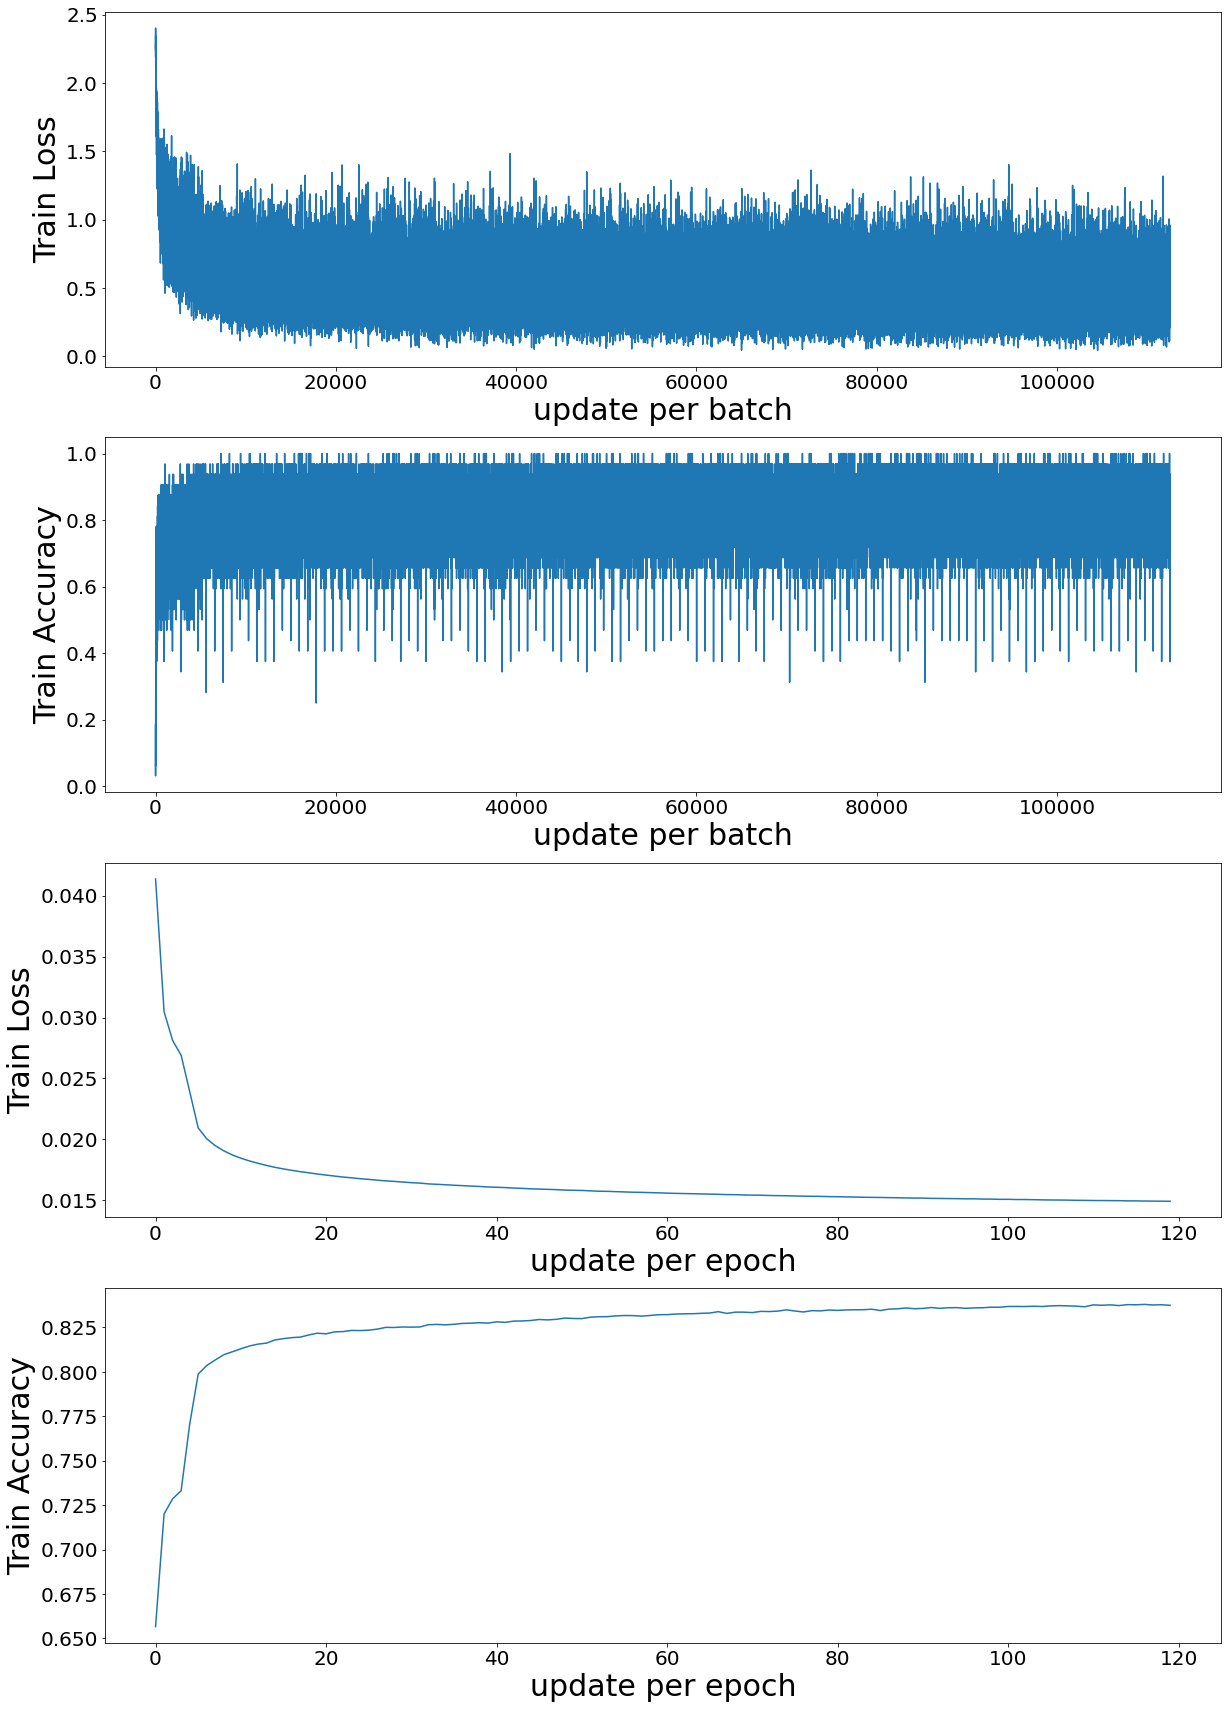

In [12]:
fig1 = plt.figure(figsize=(20,30))

plt.subplot(4,1,1)
plt.plot(train_loss_per_batch)
plt.xlabel('update per batch', fontsize=30)
plt.ylabel('Train Loss', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(4,1,2)
plt.plot(train_accuracy_per_batch)
plt.xlabel('update per batch', fontsize=30)
plt.ylabel('Train Accuracy', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(4,1,3)
plt.plot(train_loss_per_epoch)
plt.xlabel('update per epoch', fontsize=30)
plt.ylabel('Train Loss', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(4,1,4)
plt.plot(train_accuracy_per_epoch)
plt.xlabel('update per epoch', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Train Accuracy', fontsize=30)


## Plotting Test error and accuracy

Text(0, 0.5, 'Test Accuracy')

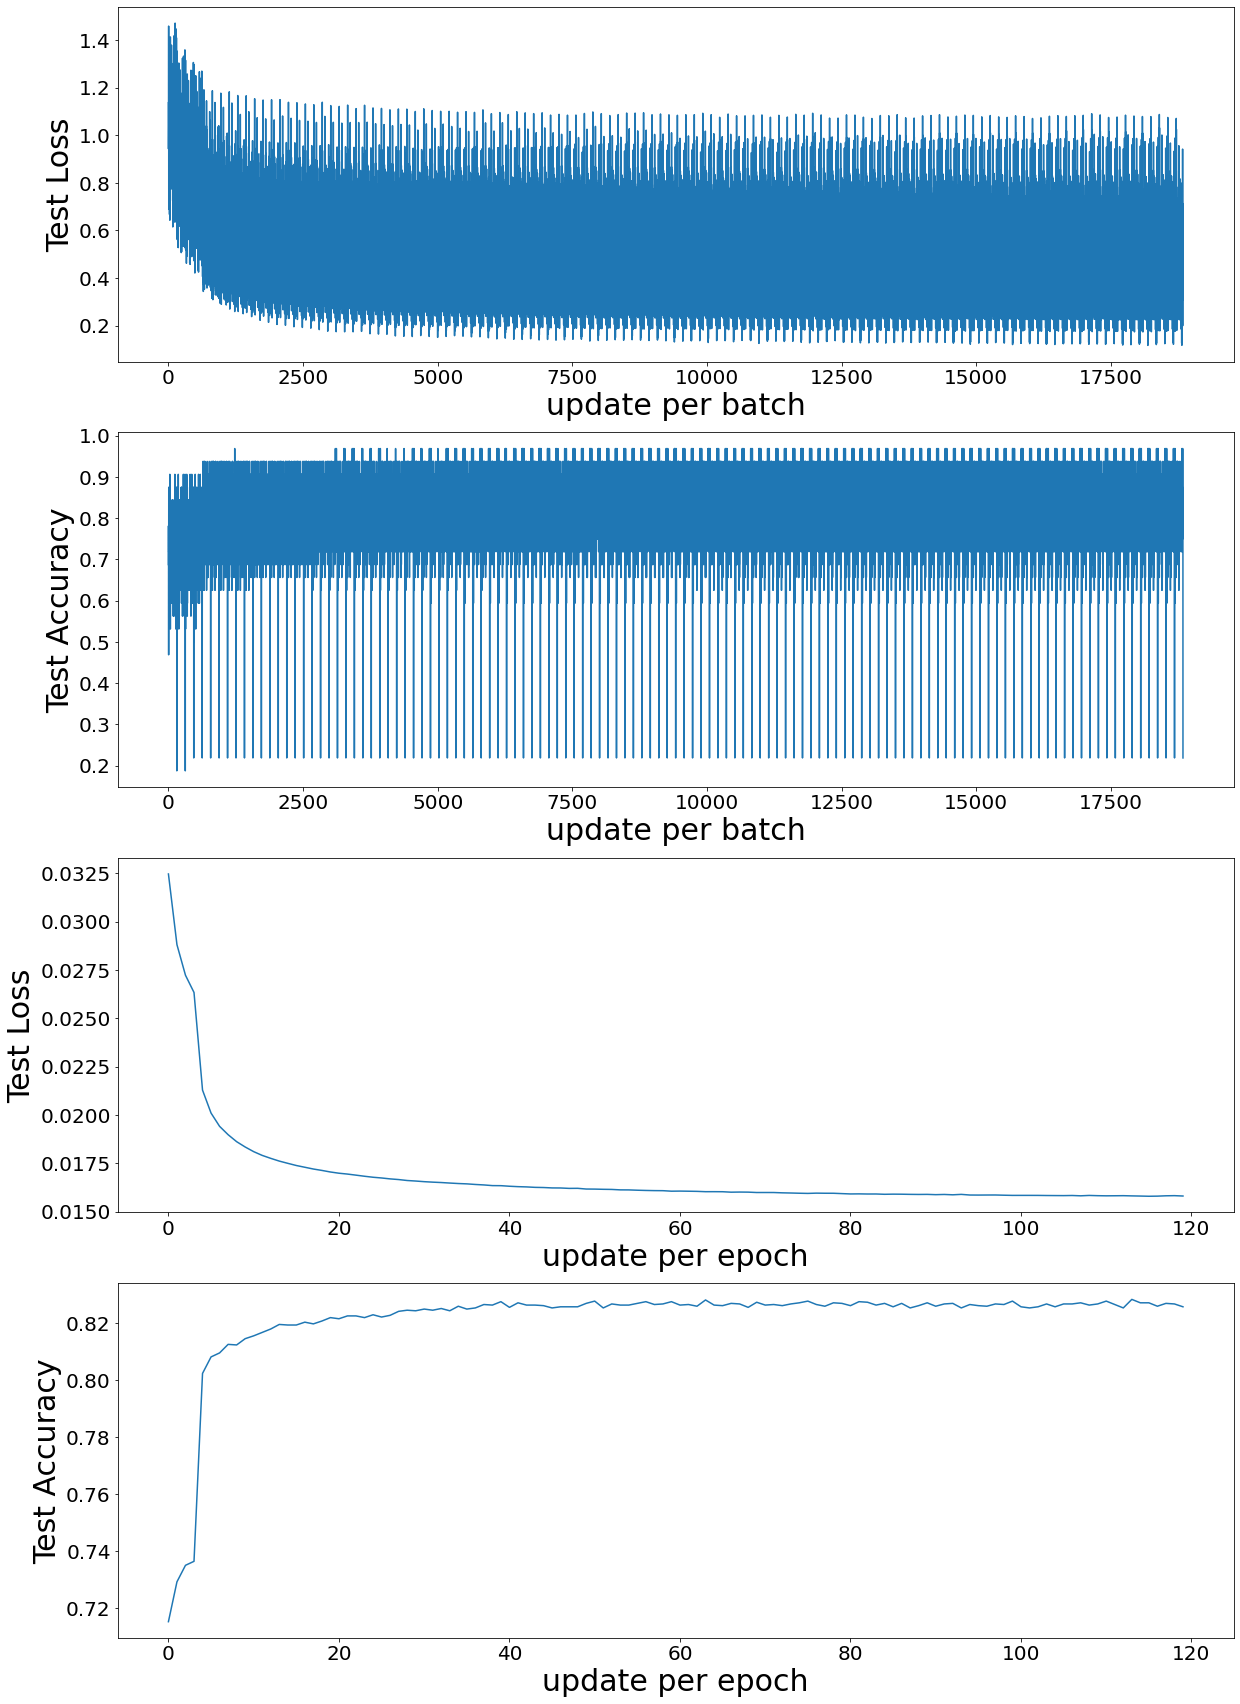

In [13]:
fig1 = plt.figure(figsize=(20,30))

plt.subplot(4,1,1)
plt.plot(test_loss_per_batch)
plt.xlabel('update per batch', fontsize=30)
plt.ylabel('Test Loss', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(4,1,2)
plt.plot(test_accuracy_per_batch)
plt.xlabel('update per batch', fontsize=30)
plt.ylabel('Test Accuracy', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(4,1,3)
plt.plot(test_loss_per_epoch)
plt.xlabel('update per epoch', fontsize=30)
plt.ylabel('Test Loss', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(4,1,4)
plt.plot(test_accuracy_per_epoch)
plt.xlabel('update per epoch', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy', fontsize=30)


Text(0, 0.5, 'Accuracy')

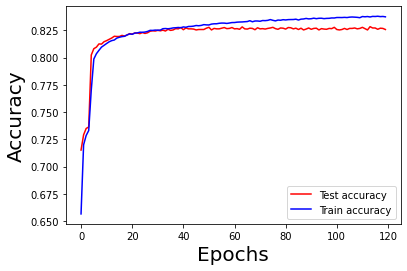

In [14]:
plt.plot(test_accuracy_per_epoch,'-r',label='Test accuracy')
plt.plot(train_accuracy_per_epoch,'-b',label='Train accuracy')
plt.legend(loc="lower right", fontsize='medium')

plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)


Text(0, 0.5, 'Loss')

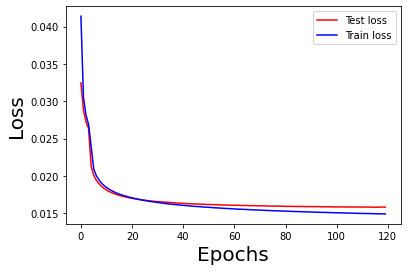

In [15]:
plt.plot(test_loss_per_epoch,'-r',label='Test loss')
plt.plot(train_loss_per_epoch,'-b',label='Train loss')
plt.legend(loc="upper right", fontsize='medium')

plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)

Text(0, 0.5, 'Error')

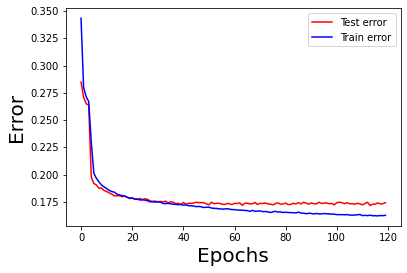

In [17]:
plt.plot(test_error_per_epoch,'-r',label='Test error')
plt.plot(train_error_per_epoch,'-b',label='Train error')
plt.legend(loc="upper right", fontsize='medium')

plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Error', fontsize=20)